# Загрузка данных

In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
!ls

gdrive	sample_data


In [0]:
!cp -r /content/gdrive/'My Drive'/plant-pathology-2020-fgvc7/images.zip .

In [0]:
!cp -r /content/gdrive/'My Drive'/plant-pathology-2020-fgvc7/test.csv .

In [0]:
!cp -r /content/gdrive/'My Drive'/plant-pathology-2020-fgvc7/train.csv .

In [6]:
!ls

gdrive	images.zip  sample_data  test.csv  train.csv


In [7]:
!unzip images.zip

Streaming output truncated to the last 5000 lines.
  inflating: __MACOSX/images/._Test_1403.jpg  
  inflating: images/Train_517.jpg    
  inflating: __MACOSX/images/._Train_517.jpg  
  inflating: images/Train_503.jpg    
  inflating: __MACOSX/images/._Train_503.jpg  
  inflating: images/Train_1162.jpg   
  inflating: __MACOSX/images/._Train_1162.jpg  
  inflating: images/Test_1417.jpg    
  inflating: __MACOSX/images/._Test_1417.jpg  
  inflating: images/Test_1371.jpg    
  inflating: __MACOSX/images/._Test_1371.jpg  
  inflating: images/Train_1604.jpg   
  inflating: __MACOSX/images/._Train_1604.jpg  
  inflating: images/Train_265.jpg    
  inflating: __MACOSX/images/._Train_265.jpg  
  inflating: images/Train_1189.jpg   
  inflating: __MACOSX/images/._Train_1189.jpg  
  inflating: images/Train_43.jpg     
  inflating: __MACOSX/images/._Train_43.jpg  
  inflating: images/Train_57.jpg     
  inflating: __MACOSX/images/._Train_57.jpg  
  inflating: images/Test_489.jpg     
  inflating: 

In [8]:
!ls 

gdrive	images	images.zip  __MACOSX  sample_data  test.csv  train.csv


## Предобработка даннах соревнований "Plant Pathology 2020 - FGVC7"

In [0]:
import shutil
import os

import numpy as np
import pandas as pd

In [0]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

In [0]:
# Каталог с набором данных
data_dir = 'images'

# Каталог с данными для обучения
train_dir = 'train'

# Каталог с данными для проверки
val_dir = 'val'

# Каталог с данными для тестирования
test_dir = 'test'

# Часть набора данных для тестирования
test_data_portion = 0.15

# Часть набора данных для проверки
val_data_portion = 0.15

# Часть набора данных для обучения
train_data_portion = 1 - test_data_portion - val_data_portion

In [0]:
# Функция создания каталога с подкаталогами по названию классов
def create_directory(dir_name):
    if os.path.exists(dir_name):
        shutil.rmtree(dir_name)
    os.makedirs(dir_name)
    os.makedirs(os.path.join(dir_name, "healthy"))
    os.makedirs(os.path.join(dir_name, "multiple_diseases"))
    os.makedirs(os.path.join(dir_name, "rust"))
    os.makedirs(os.path.join(dir_name, "scab"))

In [0]:
# Создание структуры каталогов для обучающего, проверочного и тестового набора данных
create_directory(train_dir)
create_directory(val_dir)
create_directory(test_dir)

In [0]:
# Создание папки с изображениями по которым нужно построить прогноз
dir_name = 'predict'
if os.path.exists(dir_name):
        shutil.rmtree(dir_name)
os.makedirs(dir_name)

In [0]:
healthyList = list(train[train['healthy'] == 1].index)
multiple_diseasesList = list(train[train['multiple_diseases'] == 1].index)
rustList = list(train[train['rust'] == 1].index)
scabList = list(train[train['scab'] == 1].index)

In [0]:
trainHealthyList = healthyList[0:int(len(healthyList)*train_data_portion)]
valHealthyList = healthyList[(int(len(healthyList)*train_data_portion)):-int(len(healthyList)*test_data_portion)]
testHealthyList = healthyList[-int(len(healthyList)*test_data_portion):]

In [0]:
trainMultiple_diseasesList = multiple_diseasesList[0:int(len(multiple_diseasesList)*train_data_portion)]
valMultiple_diseasesList = multiple_diseasesList[(int(len(multiple_diseasesList)*train_data_portion)):-int(len(multiple_diseasesList)*test_data_portion)]
testMultiple_diseasesList = multiple_diseasesList[-int(len(multiple_diseasesList)*test_data_portion):]

In [0]:
trainRustList = rustList[0:int(len(rustList)*train_data_portion)]
valRustList = rustList[(int(len(rustList)*train_data_portion)):-int(len(rustList)*test_data_portion)]
testRustList = rustList[-int(len(rustList)*test_data_portion):]

In [0]:
trainScabList = scabList[0:int(len(scabList)*train_data_portion)]
valScabList = scabList[(int(len(scabList)*train_data_portion)):-int(len(scabList)*test_data_portion)]
testScabList = scabList[-int(len(scabList)*test_data_portion):]

In [0]:
def copy_images(list_index, source_dir, dest_dir, name_dir):
    for i in list_index:
        shutil.copy2(os.path.join(source_dir, "Train_" + str(i) + ".jpg"), os.path.join(dest_dir, name_dir))

In [0]:
copy_images(trainHealthyList, data_dir, train_dir, 'healthy')
copy_images(valHealthyList, data_dir, val_dir, 'healthy')
copy_images(testHealthyList, data_dir, test_dir, 'healthy')

In [0]:
copy_images(trainMultiple_diseasesList, data_dir, train_dir, 'multiple_diseases')
copy_images(valMultiple_diseasesList, data_dir, val_dir, 'multiple_diseases')
copy_images(testMultiple_diseasesList, data_dir, test_dir, 'multiple_diseases')

In [0]:
copy_images(trainRustList, data_dir, train_dir, 'rust')
copy_images(valRustList, data_dir, val_dir, 'rust')
copy_images(testRustList, data_dir, test_dir, 'rust')

In [0]:
copy_images(trainScabList, data_dir, train_dir, 'scab')
copy_images(valScabList, data_dir, val_dir, 'scab')
copy_images(testScabList, data_dir, test_dir, 'scab')

In [0]:
def copy_images_test(source_dir, dest_dir):
    for i in range(0,1821):
        shutil.copy2(os.path.join(source_dir, "Test_" + str(i) + ".jpg"), os.path.join(dest_dir))

In [0]:
copy_images_test(data_dir,'predict')

In [27]:
!ls

gdrive	images.zip  predict	 test	   train      val
images	__MACOSX    sample_data  test.csv  train.csv


# Основной блок Plant Pathology 2020 - FGVC7

In [0]:
import warnings
warnings.filterwarnings('ignore')

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.models import Sequential, model_from_json, load_model
from tensorflow.python.keras.layers import Conv2D, MaxPooling2D
from tensorflow.python.keras.layers import Activation, Dropout, Flatten, Dense, GlobalAveragePooling2D
from tensorflow.python.keras import optimizers


# snippet of using the LearningRateScheduler callback
from tensorflow.python.keras.callbacks import LearningRateScheduler

from tensorflow.python.keras import regularizers

In [0]:
# Каталог с данными для обучения
train_dir = 'train'

# Каталог с данными для проверки
val_dir = 'val'

# Каталог с данными для тестирования
test_dir = 'test'

# Размеры изображения
img_width, img_height = 225, 225

# Размерность тензора на основе изображения для входных данных в нейронную сеть
# backend Tensorflow, channels_last
input_shape = (img_width, img_height, 3)

# Количество эпох
epochs = 40

# Размер мини-выборки
batch_size = 32

In [0]:
LR_START = 0.0001
LR_MAX = 0.00005 * epochs
LR_MIN = 0.0001
LR_RAMPUP_EPOCHS = 4
LR_SUSTAIN_EPOCHS = 6
LR_EXP_DECAY = .8

def my_learning_rate(epoch):
    if epoch < LR_RAMPUP_EPOCHS:
        lrate = (LR_MAX - LR_START) / LR_RAMPUP_EPOCHS * epoch + LR_START
    elif epoch < LR_RAMPUP_EPOCHS + LR_SUSTAIN_EPOCHS:
        lrate = LR_MAX
    else:
        lrate = (LR_MAX - LR_MIN) * LR_EXP_DECAY**(epoch - LR_RAMPUP_EPOCHS - LR_SUSTAIN_EPOCHS) + LR_MIN
    return lrate

Learning rate schedule: 0.0001 to 0.002 to 0.000103


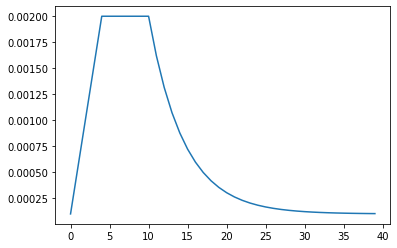

In [139]:
rng = [i for i in range(epochs)]
y = [my_learning_rate(x) for x in rng]
plt.plot(rng, y)
print("Learning rate schedule: {:.3g} to {:.3g} to {:.3g}".format(y[0], max(y), y[-1]))

In [0]:
lrs = LearningRateScheduler(my_learning_rate, verbose=1)

In [0]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(64))
model.add(Activation('relu'))
#model.add(Dropout(0.5, seed=0))

model.add(Dense(4))
model.add(Activation('softmax'))

In [142]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 223, 223, 32)      896       
_________________________________________________________________
activation_13 (Activation)   (None, 223, 223, 32)      0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
activation_14 (Activation)   (None, 109, 109, 64)      0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 52, 52, 64)       

In [0]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [0]:
image_gen_train = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [146]:
train_generator = image_gen_train.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 1273 images belonging to 4 classes.


In [0]:
image_gen_val = ImageDataGenerator(rescale=1./255)

In [148]:
val_generator = image_gen_val.flow_from_directory(
    val_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    shuffle=True,
    class_mode='categorical')

Found 277 images belonging to 4 classes.


In [149]:
test_generator = image_gen_val.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    shuffle=True,
    class_mode='categorical')

Found 271 images belonging to 4 classes.


In [0]:
# Количество изображений для обучения
nb_train_samples = 1273

# Количество изображений для проверки
nb_validation_samples = 277

# Количество изображений для тестирования
nb_test_samples = 271

In [151]:
%%time
history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size,
    callbacks=[lrs])


Epoch 00001: LearningRateScheduler reducing learning rate to 0.0001.
Epoch 1/40
39/39 [==============================] - 58s 1s/step - loss: 1.2797 - categorical_accuracy: 0.3141 - val_loss: 1.2593 - val_categorical_accuracy: 0.2852 - lr: 1.0000e-04

Epoch 00002: LearningRateScheduler reducing learning rate to 0.000575.
Epoch 2/40
39/39 [==============================] - 58s 1s/step - loss: 1.2592 - categorical_accuracy: 0.2998 - val_loss: 1.2640 - val_categorical_accuracy: 0.3242 - lr: 5.7500e-04

Epoch 00003: LearningRateScheduler reducing learning rate to 0.00105.
Epoch 3/40
39/39 [==============================] - 57s 1s/step - loss: 1.2586 - categorical_accuracy: 0.3344 - val_loss: 1.2868 - val_categorical_accuracy: 0.3945 - lr: 0.0010

Epoch 00004: LearningRateScheduler reducing learning rate to 0.001525.
Epoch 4/40
39/39 [==============================] - 58s 1s/step - loss: 1.2484 - categorical_accuracy: 0.3038 - val_loss: 1.2480 - val_categorical_accuracy: 0.3359 - lr: 0.0015

In [152]:
print(history.history.keys())

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy', 'lr'])


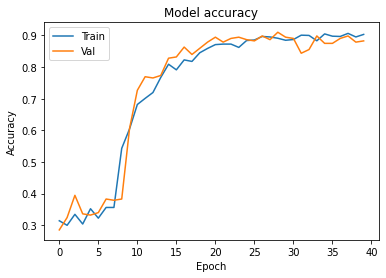

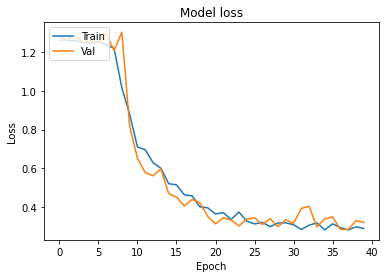

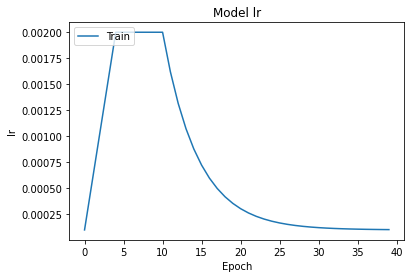

In [154]:
# Plot training & validation accuracy values
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot learning rate
plt.plot(history.history['lr'])
plt.title('Model lr')
plt.ylabel('lr')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

In [155]:
scores = model.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("accuracy score на тестовых данных: %.2f%%" % (scores[1]*100))

accuracy score на тестовых данных: 85.94%


In [0]:
!rm plantPathology_cnn.h5 & rm plantPathology_cnn.json

In [157]:
# Генерируем описание модели в формате json
model_json = model.to_json()

with open('plantPathology_cnn.json', 'w') as json_file:
    # Записываем архитектуру сети в файл
    json_file.write(model_json)

# Записываем данные о весах в файл
model.save_weights('plantPathology_cnn.h5')
    
print('Сохранение завершено')

Сохранение завершено


In [0]:
#files.download("plantPathology_cnn.json")
#files.download("plantPathology_cnn.h5")

# Предсказания

In [0]:
import warnings
warnings.filterwarnings('ignore')

In [0]:
import tensorflow
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras.preprocessing import image

In [0]:
%matplotlib inline

In [0]:
test = pd.read_csv('test.csv')

In [0]:
# Список классов
classes = ['healthy', 'multiple_diseases', 'rust', 'scab']

In [0]:
with open("plantPathology_cnn.json", "r") as json_file:
    loaded_model_json = json_file.read()

loaded_model = tensorflow.keras.models.model_from_json(loaded_model_json)
loaded_model.load_weights("plantPathology_cnn.h5")

In [0]:
loaded_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [0]:
answers = pd.DataFrame()
for i in range(0, 1821):
    img = image.load_img('./predict/Test_' + str(i) + '.jpg', target_size=(img_width, img_height))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = x/255
    probabilities = loaded_model.predict(x)
    
    h = np.around(probabilities[0][0], 2)
    m = np.around(probabilities[0][1], 2)
    r = np.around(probabilities[0][2], 2)
    s = np.around(probabilities[0][3], 2)

    new_line = {'healthy':h, 'multiple_diseases':m,'rust':r, 'scab':s}
    answers = answers.append(new_line, ignore_index=True) 

In [0]:
test = pd.concat([test, round(answers, 2)], axis=1)

In [168]:
test.to_csv('submission.csv', sep=',', header=True, index=False)


!cat submission.csv
#!more submission.csv

image_id,healthy,multiple_diseases,rust,scab
Test_0,0.0,0.06,0.94,0.0
Test_1,0.0,0.04,0.96,0.0
Test_2,0.02,0.01,0.0,0.98
Test_3,0.99,0.0,0.0,0.0
Test_4,0.0,0.01,0.99,0.0
Test_5,0.11,0.03,0.0,0.86
Test_6,0.99,0.0,0.0,0.01
Test_7,0.02,0.03,0.0,0.94
Test_8,0.01,0.05,0.0,0.94
Test_9,0.0,0.03,0.97,0.0
Test_10,0.0,0.01,0.99,0.0
Test_11,0.98,0.01,0.01,0.01
Test_12,0.57,0.04,0.0,0.39
Test_13,0.99,0.0,0.0,0.01
Test_14,0.0,0.0,1.0,0.0
Test_15,0.0,0.01,0.99,0.0
Test_16,0.99,0.0,0.0,0.0
Test_17,0.01,0.01,0.0,0.98
Test_18,0.89,0.01,0.0,0.1
Test_19,0.0,0.0,1.0,0.0
Test_20,0.04,0.02,0.0,0.94
Test_21,0.73,0.02,0.0,0.24
Test_22,0.0,0.07,0.93,0.0
Test_23,0.04,0.03,0.0,0.93
Test_24,0.97,0.0,0.0,0.02
Test_25,0.23,0.02,0.0,0.74
Test_26,0.17,0.08,0.01,0.74
Test_27,0.0,0.05,0.95,0.0
Test_28,0.99,0.0,0.0,0.0
Test_29,0.0,0.46,0.49,0.05
Test_30,0.94,0.02,0.0,0.04
Test_31,0.0,0.2,0.8,0.0
Test_32,0.01,0.03,0.0,0.96
Test_33,0.0,0.0,0.0,0.99
Test_34,0.21,0.03,0.0,0.76
Test_35,0.03,0.01,0.0,0.96
Test_36,0.0,0.0,1.0,

In [0]:
from google.colab import files
files.download('submission.csv') 

# Transfer Learning VGG16

In [0]:
from tensorflow.python.keras.applications.vgg16 import VGG16

In [0]:
vgg16_net = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

"Замораживаем" веса предварительно обученной нейронной сети VGG16

In [0]:
vgg16_net.trainable = False

In [181]:
vgg16_net.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 225, 225, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 225, 225, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 225, 225, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

### Создаем составную нейронную сеть на основе VGG16

In [0]:
model = Sequential()
# Добавляем в модель сеть VGG16
model.add(vgg16_net)

model.add(GlobalAveragePooling2D())

#model.add(Flatten())

model.add(Dense(4))
model.add(Activation('softmax'))

In [187]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
global_average_pooling2d_2 ( (None, 512)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 4)                 2052      
_________________________________________________________________
activation_22 (Activation)   (None, 4)                 0         
Total params: 14,716,740
Trainable params: 2,052
Non-trainable params: 14,714,688
_________________________________________________________________


Компилируем составную нейронную сеть

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam', 
              metrics=['categorical_accuracy'])

In [0]:
%%time
history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size,
    callbacks=[lrs])


Epoch 00001: LearningRateScheduler reducing learning rate to 0.0001.
Epoch 1/40
39/39 [==============================] - ETA: 0s - loss: 1.8422 - categorical_accuracy: 0.1467

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot learning rate
plt.plot(history.history['lr'])
plt.title('Model lr')
plt.ylabel('lr')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

In [0]:
scores = model.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("accuracy score на тестовых данных: %.2f%%" % (scores[1]*100))

In [0]:
!rm plantPathology_cnn_TL.h5 & rm plantPathology_cnn_TL.json

In [0]:
# Генерируем описание модели в формате json
model_json = model.to_json()

with open('plantPathology_cnn_TL.json', 'w') as json_file:
    # Записываем архитектуру сети в файл
    json_file.write(model_json)

# Записываем данные о весах в файл
model.save_weights('plantPathology_cnn_TL.h5')
    
print('Сохранение завершено')

Тонкая настройка сети (fine tuning) - 
https://github.com/sozykin/dlpython_course/blob/master/computer_vision/cats_and_dogs/cats_and_dogs_vgg16.ipynb

# Предсказания LT VGG16

In [0]:
import warnings
warnings.filterwarnings('ignore')

In [0]:
import tensorflow
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras.preprocessing import image

In [0]:
%matplotlib inline

In [0]:
test = pd.read_csv('test.csv')

In [0]:
# Список классов
classes = ['healthy', 'multiple_diseases', 'rust', 'scab']

In [0]:
with open("plantPathology_cnn_TL.json", "r") as json_file:
    loaded_model_json = json_file.read()

loaded_model = tensorflow.keras.models.model_from_json(loaded_model_json)
loaded_model.load_weights("plantPathology_cnn_TL.h5")

In [0]:
loaded_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [0]:
answers = pd.DataFrame()
for i in range(0, 1821):
    img = image.load_img('./predict/Test_' + str(i) + '.jpg', target_size=(img_width, img_height))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = x/255
    probabilities = loaded_model.predict(x)
    
    h = np.around(probabilities[0][0], 2)
    m = np.around(probabilities[0][1], 2)
    r = np.around(probabilities[0][2], 2)
    s = np.around(probabilities[0][3], 2)

    new_line = {'healthy':h, 'multiple_diseases':m,'rust':r, 'scab':s}
    answers = answers.append(new_line, ignore_index=True) 

In [0]:
test = pd.concat([test, round(answers, 2)], axis=1)

In [0]:
test.to_csv('submission_LT.csv', sep=',', header=True, index=False)


!cat submission_LT.csv
#!more submission_LT.csv

In [0]:
from google.colab import files
files.download('submission_LT.csv') 

# Transfer Learning MobileNet v2

In [0]:
from tensorflow.python.keras.applications.mobilenet_v2 import MobileNetV2


In [0]:
MobileNetV2_net = MobileNetV2(weights='imagenet', include_top=False, input_shape=input_shape)

In [0]:
MobileNetV2_net.trainable = False

In [0]:
MobileNetV2_net.summary()

In [0]:
model = Sequential()
# Добавляем в модель сеть 
model.add(MobileNetV2_net)

model.add(GlobalAveragePooling2D())

#model.add(Flatten())

model.add(Dense(4))
model.add(Activation('softmax'))

In [0]:
model.summary()

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam', 
              metrics=['categorical_accuracy'])

In [0]:
%%time
history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size,
    callbacks=[lrs])

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot learning rate
plt.plot(history.history['lr'])
plt.title('Model lr')
plt.ylabel('lr')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

In [0]:
scores = model.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("accuracy score на тестовых данных: %.2f%%" % (scores[1]*100))

In [0]:
!rm plantPathology_cnn_TL1.h5 & rm plantPathology_cnn_TL1.json

In [0]:
# Генерируем описание модели в формате json
model_json = model.to_json()

with open('plantPathology_cnn_TL1.json', 'w') as json_file:
    # Записываем архитектуру сети в файл
    json_file.write(model_json)

# Записываем данные о весах в файл
model.save_weights('plantPathology_cnn_TL1.h5')
    
print('Сохранение завершено')

# Predict MobileNet

In [0]:
test = pd.read_csv('test.csv')

In [0]:
with open("plantPathology_cnn_TL1.json", "r") as json_file:
    loaded_model_json = json_file.read()

loaded_model = tensorflow.keras.models.model_from_json(loaded_model_json)
loaded_model.load_weights("plantPathology_cnn_TL1.h5")

In [0]:
loaded_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [0]:
answers = pd.DataFrame()
for i in range(0, 1821):
    img = image.load_img('./predict/Test_' + str(i) + '.jpg', target_size=(img_width, img_height))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = x/255
    probabilities = loaded_model.predict(x)
    
    h = np.around(probabilities[0][0], 2)
    m = np.around(probabilities[0][1], 2)
    r = np.around(probabilities[0][2], 2)
    s = np.around(probabilities[0][3], 2)

    new_line = {'healthy':h, 'multiple_diseases':m,'rust':r, 'scab':s}
    answers = answers.append(new_line, ignore_index=True) 

In [0]:
test = pd.concat([test, round(answers, 2)], axis=1)

In [0]:
test.to_csv('submission_LT1.csv', sep=',', header=True, index=False)


!cat submission_LT1.csv
#!more submission_LT1.csv

In [0]:
from google.colab import files
files.download('submission_LT1.csv') 